# SVM Spam Filter

In [11]:
import numpy as np
import numexpr as ne
import matplotlib.pyplot as plt
import scipy.io

In [12]:
data1 = scipy.io.loadmat('data/ex6data1.mat')
X1_raw = data1['X']
y1_raw = data1['y']

In [13]:
X1_cls1_raw = X1_raw[(y1_raw == 0).flatten()]
X1_cls2_raw = X1_raw[(y1_raw == 1).flatten()]

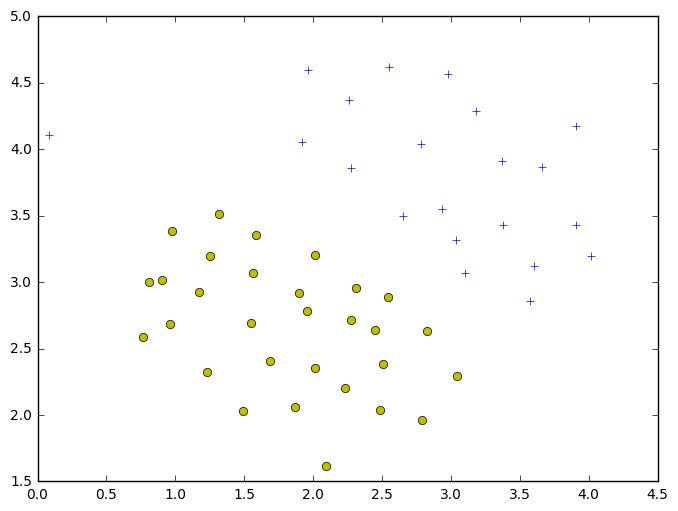

In [15]:
fig = plt.figure(figsize=(8, 6))
plt.plot(X1_cls1_raw[:, 0], X1_cls1_raw[:, 1], 'yo')
plt.plot(X1_cls2_raw[:, 0], X1_cls2_raw[:, 1], 'b+')
plt.show()